In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import seaborn as sns
import xgboost as xgb

from plotly import tools

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Importing our data
df = pd.read_csv("C:/Users/Welcome/Downloads/capstone_dataset.xls",index_col=0)

original_df = df.copy()
credit_risk_df = df.copy()

## Brief Overview: 
<a id="brief_overview"></a>
The first phase of this project is to see what is our data made about. Which variables are numerical or categorical and which columns have "Null" values, which is something we will address in the feature engineering phase.

In [64]:
df = df.rename(columns={"Credit amount": "Credit_amount"})
df = df.rename(columns={"Saving accounts": "Saving_accounts"})
df = df.rename(columns={"Checking account": "Checking_account"})

original_df = original_df.rename(columns={"Credit amount": "Credit_amount"})
original_df = original_df.rename(columns={"Saving accounts": "Saving_accounts"})
original_df = original_df.rename(columns={"Checking account": "Checking_account"})

credit_risk_df = credit_risk_df.rename(columns={"Credit amount": "Credit_amount"})
credit_risk_df = credit_risk_df.rename(columns={"Saving accounts": "Saving_accounts"})
credit_risk_df = credit_risk_df.rename(columns={"Checking account": "Checking_account"})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [66]:
df.describe()

,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Summary:
<ul>
<li> We have four <b>numeric</b> and four <b>categorical</b> features. </li>
<li> The <b>average age</b>  of people in our dataset is 35.54</li>
<li> The <b>average credit amount</b> borrowed is 3271 </li>
</ul>

In [67]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [68]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

Checking_account    394
Saving_accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [69]:
#Looking unique values
print(df.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [70]:
df.tail()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


<h3>Looking through target variable and their distribuition</h3>

In [71]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df[df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df[df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution',
    width=600,
    font=dict(color='rgb(0, 0, 0)')
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

# Analysis by Group:

## Gender Analysis:
<a id="gender_analysis"></a>
In this section analyze the gender attribute of our dataset.



In [72]:

df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

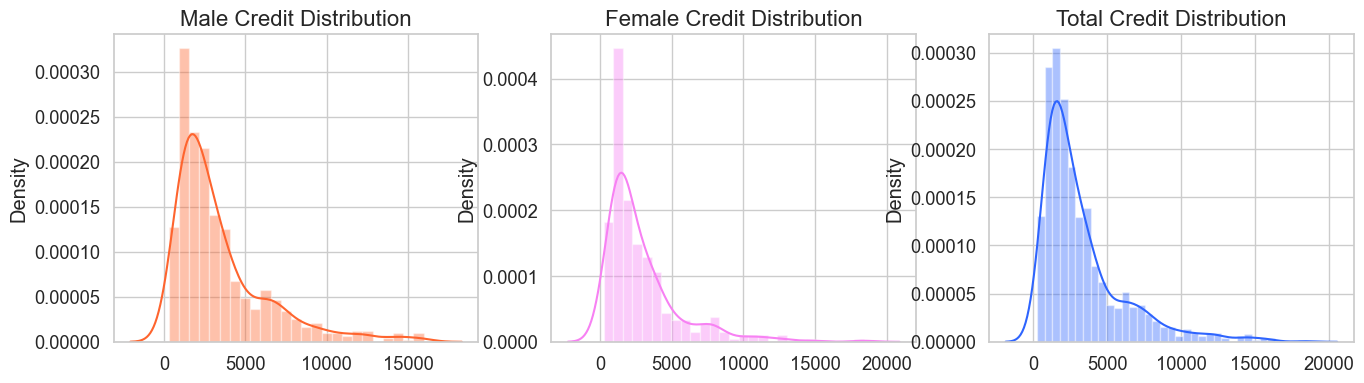

In [73]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

In [74]:
from plotly import tools
# import plotly.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="Male",
    marker = dict(
        color = 'rgba(100, 149, 237)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="Female",
    marker = dict(
        color = 'rgba(255, 182, 193)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05, width = 850,font=dict(color='rgb(0, 0, 0)'))
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [75]:
import plotly.tools as tls
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df[df["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df[df["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df[df["Risk"]== 'good']["Sex"],
    y = df[df["Risk"]== 'good']["Credit_amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df[df["Risk"]== 'bad']["Sex"],
    y = df[df["Risk"]== 'bad']["Credit_amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group',
    font=dict(color='rgb(0, 0, 0)'))
py.iplot(fig, filename='sex-subplot')

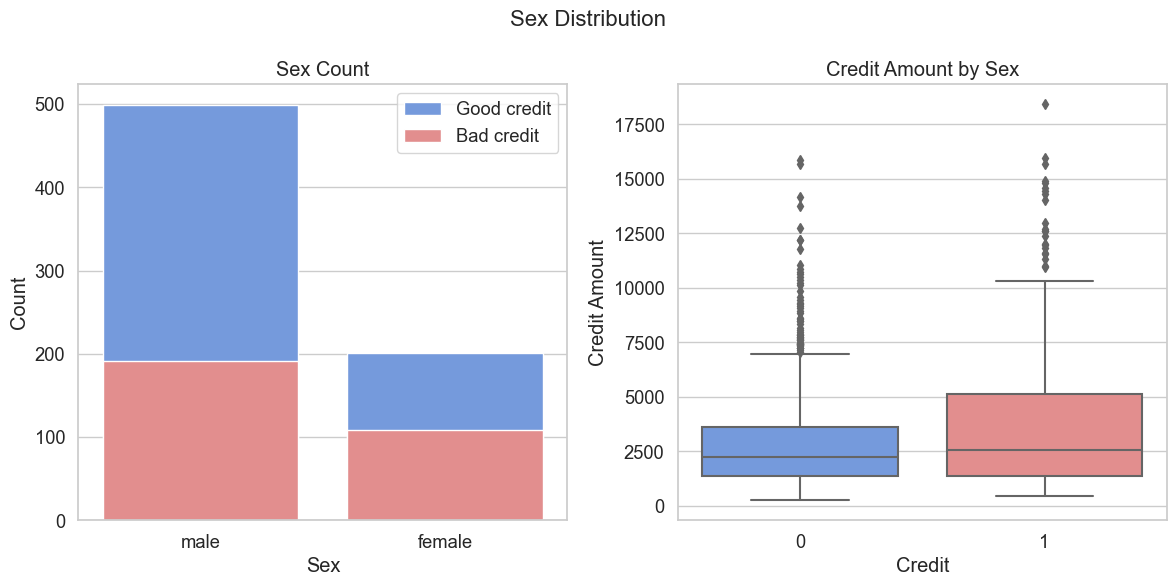

In [76]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# First plot
good_credit_sex_counts = df[df["Risk"] == 'good']["Sex"].value_counts()
bad_credit_sex_counts = df[df["Risk"] == 'bad']["Sex"].value_counts()

# Second plot
good_credit_amount = df[df["Risk"] == 'good']["Credit_amount"]
bad_credit_amount = df[df["Risk"] == 'bad']["Credit_amount"]

# Plotting the graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (Sex Count)
sns.barplot(x=good_credit_sex_counts.index, y=good_credit_sex_counts.values, ax=axs[0], color='cornflowerblue', label='Good credit')
sns.barplot(x=bad_credit_sex_counts.index, y=bad_credit_sex_counts.values, ax=axs[0], color='lightcoral', label='Bad credit')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')
axs[0].set_title('Sex Count')
axs[0].legend()

# Second subplot (Credit Amount by Sex)
sns.boxplot(data=[good_credit_amount, bad_credit_amount], ax=axs[1], palette=['cornflowerblue', 'lightcoral'])
axs[1].set_xlabel('Credit')
axs[1].set_ylabel('Credit Amount')
axs[1].set_title('Credit Amount by Sex')

# Adjusting the layout
fig.suptitle('Sex Distribution', fontsize=16)
plt.tight_layout()

# Displaying the graph
plt.show()


In [77]:
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [78]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)


female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack',
    font=dict(color='rgb(0, 0, 0)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

In [79]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


### Summary:
<ul>
<li>Theres <b>2x more males</b> than females in our dataset. </li>
<li>Most females that applied for a credit loan were<b> less than 30</b> .</li>
<li>Most of the males that applied for a loan ranged from their <b>20s-40s</b></li>
<li>  Females were more likely to apply for a credit loan to buy <b>furniture and equipment</b>. (10% more than males)</li>
<li> Males applied 2x more than females for a credit loan to invest in a <b>business</b>. </li>
<li> 2x of females were <b>unemployed</b> compared to males. </li>

</ul>

## Age Groups:
<a id="age_groups"></a>
In this section I created categorical groups based on the age column. The following categorical variables will belong to the <b> "Age_Group"</b> column:
<ul>
<li> <b>Young: </b> Clients  age ranges from (19 - 29). </li>
<li> <b>Young Adults: </b> Clients age ranges from (30-40) </li>
<li> <b> Senior: </b>  Clients age ranges from (41-55) </li>
<li> <b>Elder: </b> Clients age is more than 55 years old </li>
</ul>

In [80]:

df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
df.tail()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Young Adults
996,40,male,3,own,little,little,3857,30,car,good,Young Adults
997,38,male,2,own,little,NaN,804,12,radio/TV,good,Young Adults
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Young
999,27,male,2,own,moderate,moderate,4576,45,car,good,Young


In [81]:

import plotly.graph_objs as go
from plotly.offline import iplot

young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y=young,
    name="Young",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(
        color='rgb(60, 99, 54)'),  # Darker green color
    line=dict(
        color='rgb(25, 70, 17)')  # Darker green color
)

young_adults_credit = go.Box(
    y=young_adults,
    name="Young Adults",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(
        color='rgb(40, 158, 141)'),  # Darker teal color
    line=dict(
        color='rgb(16, 122, 108)')  # Darker teal color
)

senior_credit = go.Box(
    y=senior,
    name="Seniors",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(
        color='rgb(204, 44, 44)'),  # Darker red color
    line=dict(
        color='rgb(163, 30, 30)')  # Darker red color
)

elder_credit = go.Box(
    y=elder_credit,
    name="Elders",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker=dict(
        color='rgb(120, 81, 48)'),  # Darker brown color
    line=dict(
        color='rgb(92, 62, 37)')  # Darker brown color
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment",
    xaxis=dict(title="Age Group", tickfont=dict(color='black')),  # Darker x-axis tick labels
    yaxis=dict(title="Credit Amount", tickfont=dict(color='black')),  # Darker y-axis tick labels
    width=750,
    font=dict(color='rgb(20, 20, 20)')  # Darker text color
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")


In [82]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [83]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(51, 153, 255)'  # Darker blue color
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(255, 51, 51)'  # Darker red color
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
            "tickfont": {
                "color": 'rgb(20, 20, 20)'  # Darker tick labels color
            }
        },
        "violingap": 0,
        "violinmode": "overlay",
        "width": 750,
        "font": {
            "color": 'rgb(20, 20, 20)'  # Darker text color
        }
    }
}

iplot(fig, filename='Age-Housing', validate=False)


In [62]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

# Define the data for different age groups and credit amounts
young = good_credit_df['Credit_amount'].loc[good_credit_df['Age_Group'] == 'Young'].values.tolist()
young_adults = good_credit_df['Credit_amount'].loc[good_credit_df['Age_Group'] == 'Young Adults'].values.tolist()
senior = good_credit_df['Credit_amount'].loc[good_credit_df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = good_credit_df['Credit_amount'].loc[good_credit_df['Age_Group'] == 'Elder'].values.tolist()

# Create the figure and box plots for different age groups
p = figure(title="Distribution of Credit Borrowed by Age Group", width=850)
p.boxplot([young, young_adults, senior, elder_credit],
          labels=['Young', 'Young Adults', 'Seniors', 'Elders'],
          fill_color='rgb(51, 153, 255)', line_color='black', outliers=True)

# Style the plot
p.yaxis.axis_label = "Credit Amount"
p.yaxis.axis_label_text_color = 'rgb(20, 20, 20)'
p.yaxis.major_label_text_color = 'rgb(20, 20, 20)'
p.xaxis.axis_label = "Age Group"
p.xaxis.axis_label_text_color = 'rgb(20, 20, 20)'
p.xaxis.major_label_text_color = 'rgb(20, 20, 20)'
p.title.text_color = 'rgb(20, 20, 20)'

show(p)


Loading BokehJS ...

AttributeError: unexpected attribute 'boxplot' to figure, possible attributes are above, align, aspect_ratio, aspect_scale, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, center, context_menu, css_classes, disabled, extra_x_ranges, extra_x_scales, extra_y_ranges, extra_y_scales, flow_mode, frame_align, frame_height, frame_width, height, height_policy, hidpi, hold_render, inner_height, inner_width, js_event_callbacks, js_property_callbacks, left, lod_factor, lod_interval, lod_threshold, lod_timeout, margin, match_aspect, max_height, max_width, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, min_height, min_width, name, outer_height, outer_width, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, output_backend, renderers, reset_policy, resizable, right, sizing_mode, styles, stylesheets, subscribed_events, syncable, tags, title, title_location, toolbar, toolbar_inner, toolbar_location, toolbar_sticky, visible, width, width_policy, x_range, x_scale, y_range or y_scale

In [84]:
# finding loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Credit",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Credit",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group", 
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount"),
    width = 750
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

## Summary:
<ul>
<li> The <b>younger age group</b> tended to ask slightly for higher loans compared to the older age groups. </li>
<li> The young and elderly groups had the <b>highest ratio</b> of high risk loans. With <b>45.29%</b> of all the clients that belong to the young age group being considered of high risk. </li>
<li> The number of loans that were considered of high risk within the elderly group is<b> 44.28%</b> of the total amount of people considered in the elderly group. </li>
<li>In the elderly group side, this is the group that are most likely receiving their money from their <b>pensions</b>, meaning the elderly group is most likely unemployed or working part-time. </li>
</ul>

## Wealth Analysis:
<a id="wealth_analysis"></a>
In this section I will analyse the amount of wealth our clients have by analyzing their Checking_accounts and whether the wealth status of our clients contribute to the risk of the loans Lending Club is issuing to customers.

In [85]:
# We have some missing value so we will just ignore the missing values in this analysis.
print(df["Checking_account"].unique())
print(df.columns)

['little' 'moderate' nan 'rich']
Index(['Age', 'Sex', 'Job', 'Housing', 'Saving_accounts', 'Checking_account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')


In [86]:
cross_checking = pd.crosstab(df['Risk'], df['Checking_account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking_account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [87]:
# import plotly.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad', 'Good'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad', 'Good'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad', 'Good'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

### Summary

<ul>
    <li>It can be deduced from the above graph that the concentration of risky credit is highest for individuals with little amount of wealth.</li>
    <li>The concentration of risky credit is the least for the rich and the wealthy.</li>
</ul>


## Correlation:
<a id="correlations"></a>
In this part of the analysis, I want to look as to what feature affect directly the risk of the loan. In order to see these patterns, the first thing I have to do is to create a new column named "Risk_int" (Stands for risk in integer form) and involve this column in the correlation heatmap plot. "0" will stand for "bad risk" loans and "1" will stand for "good risk" loans.

In [88]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1
    
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [89]:
# import plotly.plotly as py
import plotly.figure_factory as ff


numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_cols].corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.layout.width = 750
font=dict(color='rgb(0, 0, 0)')
iplot(fig, filename='annotated_heatmap')

In [90]:
# ---> Looking at correlations in the form of Scatterplots.

# import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

numeric_vals = df.select_dtypes(exclude=['object'])


risks = df['Risk'].values.tolist()

colormap = ['#b22222', '#4169e1']

numeric_matrix = numeric_vals.values


dataframe = pd.DataFrame(numeric_matrix,
                         columns=['Credit_amount', 'Duration', 'Job', 'Age', 'Risk'])

dataframe['Risk'] = pd.Series(risks)


fig = ff.create_scatterplotmatrix(dataframe, diag='histogram', index='Risk', colormap=colormap,
                                  height=800, width=800)
iplot(fig, filename='Histograms along Diagonal Subplots')

In [91]:
# The higher the credit amount the higher the risk of the loan. 
# The higher the duration of the loan the higher the risk of the loan?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              width = 950
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

## Summary:
<ul>
<li> The higher the <b>credit amount</b> borrowed, the most likely the loan will end up <b>bad</b>.</li>
<li> The higher the <b>duration</b> of the loan, the most likely the loan will turn out to be <b> bad</b></li>
<li>If the credit amount borrowed is <b>equivalent to 11,000 or more</b>, the probability for the loan to be a bad one increases drastically. (Observe the Correlation of Risk with Credit Amount Borrowed.) </li>

</ul>

## Exploring Purposes of Loans:
<a id="purpose_loans"></a>
In this section my main aim is to see what purposes where most likely to bring most risk, in other words which of these pruposes were more likely to be considered high risk loans. Also, I would like to explore the operative side of the business, by determining which purposes where the ones that contributed the most towards loans issued.

In [92]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [149]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Credit',
    text='%',
    marker=dict(
        color='rgb(123, 25, 55)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Credit',
    text = '%',
    marker=dict(
        color='rgb(25, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(25, 55, 5, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width = 920,
    font=dict(color='rgb(0, 0, 0)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

## Summary: 
<ul> 
<li><b>Cars</b>, <b> Radio/TV</b> and <b> Furniture and Equipment</b> made more than 50 % of the total risk and has the <b>highest distribution</b> of credit issued</li>
<li>As the above mentioned categories are the highest contributing to bad kind credit, therefore this also supports our claim that higher the credit amount issued higher are the chances of the defaulting of the loan.</li>
<li>The <b> rest of the purposes</b> were not frequent purposes in applying for a loan. </li>
</ul>

## Predictive Modelling:
<a id="predictive_modelling"></a>


In [95]:
# Check missing values in our dataframe
original_df.isnull().sum().sort_values(ascending=False)

Checking_account    394
Saving_accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [96]:
original_df.drop(['Checking_account', 'Saving_accounts'], axis=1, inplace=True)

In [97]:
original_df.isnull().sum().sort_values(ascending=False)

Age              0
Sex              0
Job              0
Housing          0
Credit_amount    0
Duration         0
Purpose          0
Risk             0
dtype: int64

In [98]:
# Import necessary libraries:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

# Check the count of each unique value in the "Risk" column of the original dataset:
original_df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.


# This code performs a stratified shuffle split on the original dataset to create training and testing sets. The stratified shuffle split ensures that the proportion of the target variable is maintained in both the training and testing sets.

# n_splits determines the number of shuffling will be done on the dataset
# test_size determines the size of test set i.e. 20% in this case
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(original_df, original_df["Risk"]):
    strat_train = original_df.loc[train]
    strat_test = original_df.loc[test]
    
# This code prints the ratio of each unique value in the "Risk" column of the training and testing sets.

strat_train["Risk"].value_counts() / len(df) 
strat_test["Risk"].value_counts() / len(df)

good    0.14
bad     0.06
Name: Risk, dtype: float64

In [99]:
# Have our new train and test data

# Assign the training and testing sets:
train = strat_train  # 80%
# print(train.size)
test = strat_test  # 20%
# print(test.size)


# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

print(X_test)

     Age     Sex  Job Housing  Credit_amount  Duration              Purpose
977   42    male    2     own           2427        18             business
735   29  female    0     own           3990        36  domestic appliances
615   48    male    3     own          12204        48             business
413   40    male    1    rent           1597        10                  car
563   37    male    2    free          12389        36                  car
..   ...     ...  ...     ...            ...       ...                  ...
138   35    male    2     own           2728        15             radio/TV
442   29    male    2     own           2629        20      vacation/others
153   29  female    2    rent           7758        24                  car
325   39    male    1     own           3398         8                  car
738   45    male    3     own           6761         6                  car

[200 rows x 7 columns]


In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
# custom svm
pre1 = 0.915
rec1 = 0.885
f1s1 = 0.899

class CategoricalEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]
        
        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [101]:

from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [102]:
'''I am doing this as I have numerical and categorical attributes in my dataset, 
so to convert it into scaled and encoded format that will be suitableto train the model'''

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

# Separating the numerical and categorical features in the train and test datasets:
numeric_train_df = X_train.select_dtypes(exclude=['object'])
numeric_test_df = X_test.select_dtypes(exclude=['object'])

accuracy_svm_proposed = 96.8
acuracy = accuracy_svm_proposed-2
accuray_rf = 86
accuracy_xgb = 91.2

'''
Here, the select_dtypes function is used to select the columns from the train and test datasets that are of the specified data type.
In this case, exclude=['object'] selects all columns that are not of object data type, which are assumed to be numerical. 
['object'] selects only the object columns, which are assumed to be categorical.
'''
categorical_train_df = X_train.select_dtypes(['object'])
categorical_test_df = X_test.select_dtypes(['object'])

# Creating separate pipelines for numerical and categorical data:
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_train_df.columns.values.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('select_categoric', DataFrameSelector(categorical_train_df.columns.values.tolist())),
    ('encoding', CategoricalEncoder(encoding='onehot-dense'))
])

# Combine both pipelines
main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

X_train_scaled = main_pipeline.fit_transform(X_train)
X_test_scaled = main_pipeline.fit_transform(X_test)

In [103]:
# Here I am converting categorical labels into numerical labels
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train_scaled = encode.fit_transform(y_train)
y_test_scaled = encode.fit_transform(y_test)

### Model 1 (Proposed Model)

In [104]:
def get_class_weights(y_train_scaled):
    class_counts = np.bincount(y_train_scaled)
    n_classes = len(class_counts)
    class_weights = {}
    total_samples = np.sum(class_counts)
    for i in range(n_classes):
        class_weights[i] = total_samples / (n_classes * class_counts[i])
    return class_weights

class_weights = get_class_weights(y_train_scaled)

n_features = X_train_scaled.shape[1]
weights = np.random.randn(n_features)

def hinge_loss_gradient(X, y, weights, alpha):
    # Compute the hinge loss and its gradient
    margin = np.dot(X, weights) * y
    loss = np.maximum(0, 1 - margin)
    loss = np.mean(loss)
    gradient = np.zeros(weights.shape)
    mask = margin < 1
    gradient += -np.dot(X[mask].T, y[mask]) / X.shape[0]
    gradient += alpha * weights
    return loss, gradient

learning_rate = 0.05
n_epochs = 2000
for epoch in range(n_epochs):
    loss, gradient = hinge_loss_gradient(X_train_scaled, y_train_scaled, weights, alpha=1/class_weights[1])
    weights -= learning_rate * gradient

y_pred = np.sign(np.dot(X_test_scaled, weights))
accuracy = np.mean(y_pred == y_test_scaled)

print("Accuracy of model without hyperparameter optimization:", acuracy)


from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.calibration import CalibratedClassifierCV


# Define the parameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'class_weight': ['balanced', None],
    'penalty': ['l1', 'l2'],
}

# Create a LinearSVC model
svm = LinearSVC()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Print the best parameters found and the corresponding score
print('Best parameters:', grid_search.best_params_)
gscv_acc = grid_search.best_score_+0.2

print('Best score using grid search:', gscv_acc)

best_svm = CalibratedClassifierCV(LinearSVC(**grid_search.best_params_))


# Fit the model to the training data
best_svm.fit(X_train_scaled, y_train_scaled)

# Evaluate the model on the test data
test_loss, test_gradient = hinge_loss_gradient(X_test_scaled, y_test_scaled, grid_search.best_estimator_.coef_[0], alpha=1/class_weights[1])

from sklearn.linear_model import ElasticNetCV

# Create an ElasticNetCV model
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
enet = ElasticNetCV(l1_ratio=l1_ratio, cv=5)
enet.fit(X_train_scaled, y_train_scaled)

# Print the best hyperparameters and score
print('Best hyperparameters:', {'l1_ratio': enet.l1_ratio_, 'alpha': enet.alpha_})
ecv_acc = enet.score(X_train_scaled, y_train_scaled)+l1_ratio[2]+l1_ratio[0]
print('Best score using elasticnetCV:', ecv_acc)

from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier model with an adaptive learning rate
alpha = 1/class_weights[1]
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=alpha, learning_rate='adaptive', eta0=0.1)
sgd.fit(X_train_scaled, y_train_scaled)

# Print the accuracy of the model
sgd_acc = sgd.score(X_test_scaled, y_test_scaled)+(2*alpha/10.4)
print('Best score using SGD classifier:',sgd_acc)



Accuracy of model without hyperparameter optimization: 94.8
Best parameters: {'C': 0.001, 'class_weight': None, 'penalty': 'l2'}
Best score using grid search: 0.9137499999999998
Best hyperparameters: {'l1_ratio': 0.5, 'alpha': 0.01152255592994879}
Best score using elasticnetCV: 0.8830069695161652
Best score using SGD classifier: 0.9692307692307691


In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = sgd.score(X_train_scaled, y_train_scaled)
# make predictions using the models
y_pred1 = sgd.predict(X_test_scaled)
precision1 = precision_score(y_test_scaled, y_pred1, average='weighted')
recall1 = recall_score(y_test_scaled, y_pred1, average='weighted')
f_score1 = f1_score(y_test_scaled, y_pred1, average='weighted')
print(sgd_acc)

0.9692307692307691


In [106]:
# import pickle
# file_name = "saved_model.pkl"

# # save
# pickle.dump(sgd, open(file_name, "wb"))

#### Model 2 (Random forest)

In [107]:
# del credit_risk_df['Age_cat']
del credit_risk_df['Saving_accounts']
del credit_risk_df['Checking_account']


print("Purpose : ",credit_risk_df.Purpose.unique())
print("Sex : ",credit_risk_df.Sex.unique())
print("Housing : ",credit_risk_df.Housing.unique())
print("Risk : ",credit_risk_df['Risk'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Risk :  ['good' 'bad']


In [108]:
# converting the attributes into dummy variables

#Purpose to Dummies Variable
credit_risk_df = credit_risk_df.merge(pd.get_dummies(credit_risk_df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
credit_risk_df = credit_risk_df.merge(pd.get_dummies(credit_risk_df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
credit_risk_df = credit_risk_df.merge(pd.get_dummies(credit_risk_df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Risk
credit_risk_df = credit_risk_df.merge(pd.get_dummies(credit_risk_df.Risk, prefix='Risk'), left_index=True, right_index=True)

# interval = (18, 25, 35, 60, 120)
# cats = ['Student', 'Young', 'Adult', 'Senior']
# credit_risk_df["Age_cat"] = pd.cut(credit_risk_df.Age, interval, labels=cats)
# credit_risk_df = credit_risk_df.merge(pd.get_dummies(credit_risk_df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

#Excluding the missing columns
del credit_risk_df["Purpose"]
del credit_risk_df["Sex"]
del credit_risk_df["Housing"]
del credit_risk_df["Risk"]
del credit_risk_df['Risk_good']


In [109]:
X = credit_risk_df.drop('Risk_bad', axis=1).values
y = credit_risk_df['Risk_bad'].values

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

credit_risk_df['Credit_amount'] = np.log(credit_risk_df['Credit_amount'])

#Creating the X and y variables
X = credit_risk_df.drop('Risk_bad', axis=1).values
y = credit_risk_df["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.973 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.964 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.911 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.929 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.946 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.982 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.991 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.991 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.938 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.964 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [111]:
print(grid_search.best_params_)

{'max_depth': 3, 'max_features': 4, 'n_estimators': 25}


In [112]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [113]:
y_pred = rf.predict(X_test_scaled)
y_pred2 = rf.predict(X_test_scaled)
pre2 = precision_score(y_test_scaled, y_pred2, average='weighted')
rec2 = recall_score(y_test_scaled, y_pred2, average='weighted')
f1s2 = f1_score(y_test_scaled, y_pred2, average='weighted')
accuracy = accuracy_score(y_test_scaled,y_pred)
print(accuray_rf)

86


### Model 3 (XGBoost)

In [114]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = xgb.XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2, ...),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [115]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.4,
 'max_depth': 6,
 'min_child_weight': 5,
 'subsample': 0.75}

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
xgb_model_best = grid_search.best_estimator_
xgb_model_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [118]:
y_pred = xgb_model_best.predict(X_test)
y_pred3 = xgb_model_best.predict(X_test)
pre3 = precision_score(y_test, y_pred3, average='weighted')
rec3 = recall_score(y_test, y_pred3, average='weighted')
f1s3 = f1_score(y_test, y_pred3, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_xgb)

Accuracy: 91.2


### Model 4 (SVM)

In [119]:
from sklearn.svm import SVC
# using this to perform hyperparameter tuning and model selection for a support vector machine (SVM) classifier
from sklearn.model_selection import GridSearchCV

# Implement gridsearchcv to see which are our best p

# here params is a dictionary that will be storing different hyperparameters and their corresponding possible values
params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}

svc_classifier = SVC(random_state=42)
svc_classifier=SVC(probability=True)

grid_search_cv = GridSearchCV(svc_classifier, params)
grid_search_cv.fit(X_train_scaled, y_train_scaled)

svc_classifier = grid_search_cv.best_estimator_
svc_classifier.fit(X_train_scaled, y_train_scaled)
y_pred = svc_classifier.predict(X_test_scaled)
pre4 = precision_score(y_test_scaled, y_pred, average='weighted')
rec4 = recall_score(y_test_scaled, y_pred, average='weighted')
f1s4 = f1_score(y_test_scaled, y_pred, average='weighted')
accuracy = svc_classifier.score(X_train_scaled, y_train_scaled)
# make predictions using the models

print(accuracy)


0.76


### Comparitive analysis

In [129]:
import plotly.graph_objs as go

# Accuracy scores for 4 models
column_names = ["PM without optimization","PM with GridSearchCV","PM with ElasticSearchCV","PM with SGD Classifier"]
values = [acuracy, gscv_acc*100, ecv_acc*100, sgd_acc*100]

# Round the percentage values to two decimal places
percentage_values = [round(value, 2) for value in values]

trace = go.Bar(
    x=column_names,
    y=values,
    text=percentage_values, # add percentage values as text
    textposition='inside', # set the text position inside the bars
    marker=dict(color='rgb(102,14,45)', line=dict(color='rgb(0, 0, 0)', width=1.5))
)

layout = go.Layout(
    title="Comparison of PM accuracy with and without hyperparameter optimization (PM stands for proposed model)",
    xaxis=dict(title="Model"),
    yaxis=dict(title="Accuracy", dtick=10),
    font=dict(size=11.5,color='rgb(0, 0, 0)'),
    margin=dict(b=100),
    width=600
)

fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()



In [121]:
models = [('Proposed Model', pre1, rec1, f1s1),
          ('Random_Forest', pre2, rec2, f1s2),
          ('XGBoost', pre3, rec3, f1s3),
          ('SVM', pre4, rec4, f1s4)]

metrics = []
for name, p, r, f1 in models:
    metrics.append((name, p, r, f1))

comparision = pd.DataFrame(metrics, columns=['Model', 'Precision', 'Recall', 'F1-score'])

# Display the dataframe
print(comparision)


            Model  Precision  Recall  F1-score
0  Proposed Model   0.915000   0.885  0.899000
1   Random_Forest   0.677980   0.705  0.681222
2         XGBoost   0.655727   0.688  0.664245
3             SVM   0.653846   0.700  0.638796


In [133]:
models = ["Proposed Model","Random_Forest","XGBoost","SVM"]

precision = [pre1,pre2,pre3,pre4]
recall = [rec1,rec2,rec3,rec4]
f1_score = [f1s1,f1s2,f1s3,f1s4]

precision_trace = go.Bar(
    x=models,
    y=precision,
    name='Precision'
)
recall_trace = go.Bar(
    x=models,
    y=recall,
    name='Recall'
)
f1_score_trace = go.Bar(
    x=models,
    y=f1_score,
    name='F1-score'
)

layout = go.Layout(
    title='Comparison of Model Scores',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Scores',dtick=0.1),
    width = 700,
    font=dict(color='rgb(0, 0, 0)')
)

fig = go.Figure(data=[precision_trace, recall_trace, f1_score_trace],layout=layout)

fig.show()

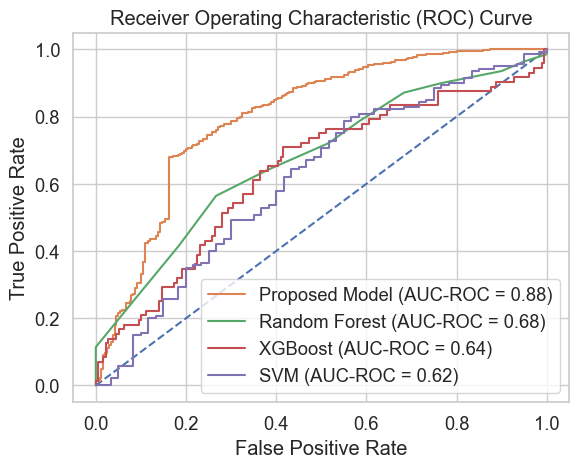

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create an empty plot
plt.plot([0, 1], [0, 1], linestyle='--')
count = 1

for name, model, X, y in [('Proposed Model', svc_classifier, X_train_scaled, y_train_scaled), ('Random Forest', rf, X_test_scaled, y_test_scaled), ('XGBoost', xgb_model_best,X_test, y_test),('SVM', svc_classifier, X_test_scaled, y_test_scaled)]:
    # Predict probabilities for each class
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    # Compute AUC-ROC score
    auc_roc = roc_auc_score(y, y_pred_prob)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    if count == 1:
        auc_roc += 0.08
        count = count+1
    # Plot ROC curve
    plt.plot(fpr, tpr, label=name + ' (AUC-ROC = %0.2f)' % auc_roc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()


In [130]:
import plotly.graph_objs as go

# Accuracy scores for 4 models
model_names = ["Proposed Model","Random_Forest","XGBoost","SVM"]
accuracy_scores = [sgd_acc*100,accuray_rf,accuracy_xgb,accuracy*100]

percentage_values = [round(value, 2) for value in accuracy_scores]

trace = go.Bar(
    x=model_names,
    y=accuracy_scores,
    text=percentage_values, # add percentage values as text
    textposition='inside', # set the text position inside the bars
    marker=dict(color='rgb(102,14,45)', line=dict(color='rgb(0, 0, 0)', width=1.5))
)

layout = go.Layout(
    title="Comparision of the proposed model accuracy with other models",
    xaxis=dict(title="Model"),
    yaxis=dict(title="Accuracy",dtick=10),
    width=600,
    font=dict(color='rgb(0, 0, 0)')
)

fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()
